In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data from MIMIC-III database

In [444]:
# Load patients data
patients = pd.read_csv('PATIENTS.csv')

In [445]:
# Load admissions data
admissions = pd.read_csv('ADMISSIONS.csv')

In [446]:
# Load ICU stays data
icustays = pd.read_csv('ICUSTAYS.csv')

In [449]:
# Load ICU procedure events
procedure_events = pd.read_csv('PROCEDUREEVENTS_MV.csv')

In [448]:
# Load ICU diagnostic codes
d_items = pd.read_csv('D_ITEMS.csv')

## Dead Patients Table 

In [450]:
from datetime import datetime
df = patients
filtered_df = df[df['EXPIRE_FLAG'] == 1]

# Calculate age function
def calculate_age(dob, dod):
    dob_date = datetime.strptime(dob, "%Y-%m-%d %H:%M:%S")
    dod_date = datetime.strptime(dod, "%Y-%m-%d %H:%M:%S")
    age = (dod_date - dob_date).days // 365
    return age

# Apply calculate_age function to create "age" column
df["AGE"] = filtered_df.apply(lambda row: calculate_age(str(row["DOB"]), str(row["DOD"])), axis=1)

In [451]:
expired_df = df[(df['EXPIRE_FLAG'] == 1) & (df['AGE'] < 100)]

In [452]:
expired_df["GENDER"].value_counts()

GENDER
M    7982
F    6297
Name: count, dtype: int64

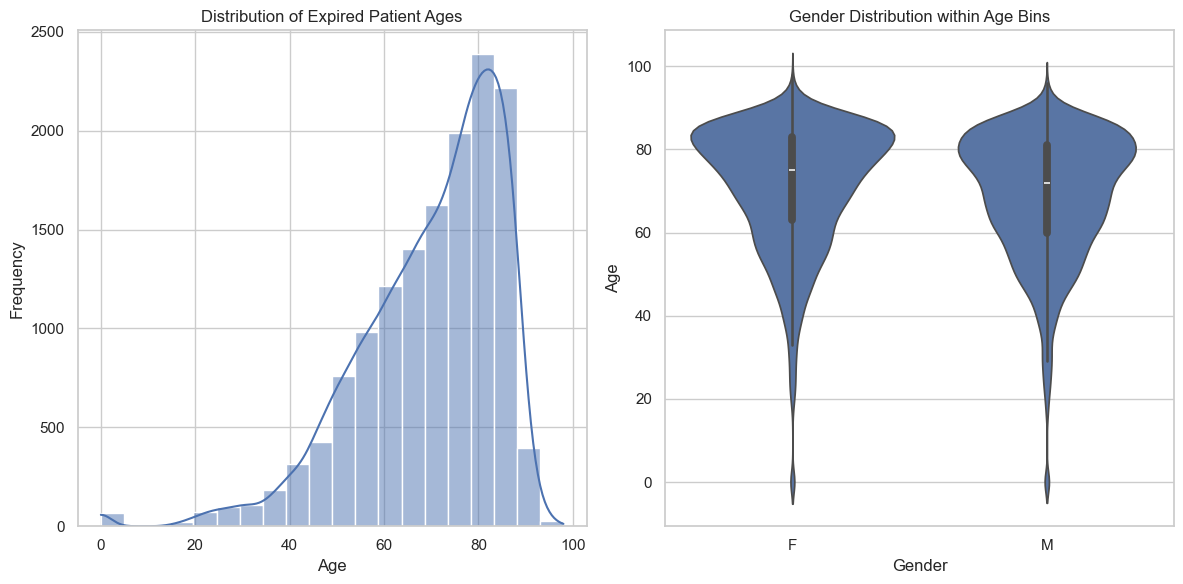

In [468]:
# Create a figure with two subplots
plt.figure(figsize=(12, 6))

# First subplot - Age distribution
plt.subplot(1, 2, 1)
sns.histplot(data=expired_df, x='AGE', bins=20, kde=True)
plt.title("Distribution of Expired Patient Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Second subplot - Gender distribution within each age bin
plt.subplot(1, 2, 2)
sns.violinplot(data=expired_df, x='GENDER', y='AGE', inner='box')
plt.title("Gender Distribution within Age Bins")
plt.xlabel("Gender")
plt.ylabel("Age")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Patients and ICU Stays Table 

In [455]:
# Merge ICU stays and patients data on subject_id
merged_data_icu = pd.merge(icustays, df[df['AGE'] < 100], on="SUBJECT_ID")
merged_data_icu.head()

,ROW_ID_x,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS,ROW_ID_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,AGE
0,365,268,110404,280836,carevue,MICU,MICU,52,52,2198-02-14 23:27:38,2198-02-18 05:26:11,3.2490,251,F,2132-02-21 00:00:00,2198-02-18 00:00:00,2198-02-18 00:00:00,NaN,1,66.0
1,371,274,130546,254851,carevue,MICU,MICU,12,12,2114-06-28 22:28:44,2114-07-07 18:01:16,8.8143,257,M,2048-05-18 00:00:00,2122-09-07 00:00:00,2122-09-07 00:00:00,NaN,1,74.0
2,372,275,129886,219649,carevue,CCU,CCU,7,7,2170-10-07 11:28:53,2170-10-14 14:38:07,7.1314,258,M,2088-08-07 00:00:00,2170-10-19 00:00:00,2170-10-19 00:00:00,2170-10-19 00:00:00,1,82.0
3,375,279,192224,204407,carevue,MICU,MICU,15,15,2164-06-14 21:18:27,2164-06-18 22:53:12,4.0658,261,M,2090-02-27 00:00:00,2164-06-27 00:00:00,NaN,2164-06-27 00:00:00,1,74.0
4,377,281,111199,257572,carevue,MICU,MICU,52,52,2101-10-18 04:45:22,2101-10-25 22:29:25,7.7389,263,F,2041-10-12 00:00:00,2101-10-25 00:00:00,2101-10-25 00:00:00,2101-10-24 00:00:00,1,60.0


In [456]:
merged_data_icu['FIRST_CAREUNIT'].value_counts()

FIRST_CAREUNIT
MICU     10368
SICU      3683
CCU       3468
CSRU      2506
TSICU     2025
NICU        67
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'MICU'),
  Text(1, 0, 'CCU'),
  Text(2, 0, 'TSICU'),
  Text(3, 0, 'SICU'),
  Text(4, 0, 'CSRU'),
  Text(5, 0, 'NICU')])

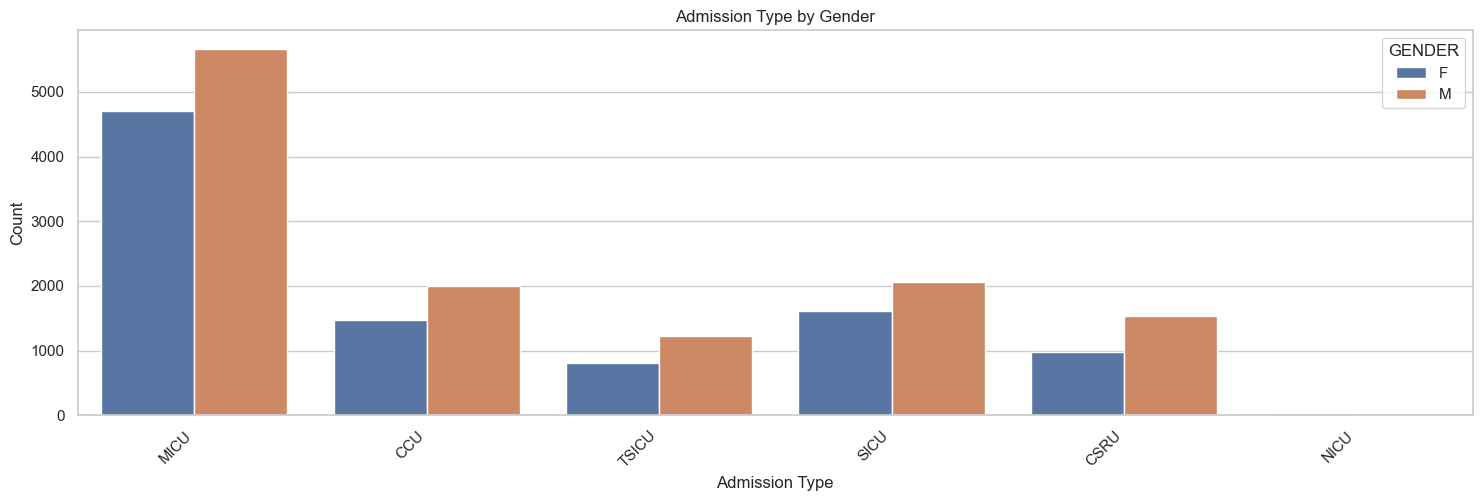

In [457]:
# Create a complex visualization
plt.figure(figsize=(18, 5))

# Analysis 1: Count plot of Admission Types by Gender
plt.subplot(1, 1, 1)
sns.countplot(data=merged_data_icu, x='FIRST_CAREUNIT', hue='GENDER')
plt.title("Admission Type by Gender")
plt.xlabel("Admission Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')


## Patients and Admissions Table

In [458]:
# Merge admissions and patients data on subject_id
merged_data_admissions = pd.merge(admissions, df[df['AGE'] < 100], on="SUBJECT_ID")
merged_data_admissions.head(5)

,ROW_ID_x,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,...,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,ROW_ID_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,AGE
0,26,26,197661,2126-05-06 15:16:00,2126-05-13 15:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Medicare,...,0,1,23,M,2054-05-04 00:00:00,2128-02-25 00:00:00,NaN,2128-02-25 00:00:00,1,73.0
1,30,31,128652,2108-08-22 23:27:00,2108-08-30 15:00:00,2108-08-30 15:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,...,1,1,27,M,2036-05-17 00:00:00,2108-08-30 00:00:00,2108-08-30 00:00:00,2108-08-30 00:00:00,1,72.0
2,39,37,188670,2183-08-21 16:48:00,2183-08-26 18:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,...,0,1,33,M,2114-09-17 00:00:00,2185-01-06 00:00:00,2185-01-06 00:00:00,2185-01-06 00:00:00,1,70.0
3,42,41,101757,2132-12-31 10:30:00,2133-01-27 15:45:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,DISC-TRAN TO FEDERAL HC,Private,...,0,1,36,M,2076-05-13 00:00:00,2133-09-30 00:00:00,NaN,2133-09-30 00:00:00,1,57.0
4,456,357,174486,2197-12-06 07:13:00,2198-01-03 14:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,...,0,1,336,M,2135-03-22 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1,66.0


In [435]:
merged_data_admissions['ADMISSION_TYPE'].value_counts()

ADMISSION_TYPE
EMERGENCY    17755
ELECTIVE      2123
URGENT         655
NEWBORN         65
Name: count, dtype: int64

In [436]:
merged_data_admissions['MARITAL_STATUS'].value_counts()

MARITAL_STATUS
MARRIED              9832
SINGLE               4439
WIDOWED              3354
DIVORCED             1388
SEPARATED             233
UNKNOWN (DEFAULT)     168
LIFE PARTNER            2
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'SINGLE'),
  Text(1, 0, 'MARRIED'),
  Text(2, 0, 'WIDOWED'),
  Text(3, 0, 'SEPARATED'),
  Text(4, 0, 'DIVORCED'),
  Text(5, 0, 'UNKNOWN (DEFAULT)'),
  Text(6, 0, 'LIFE PARTNER')])

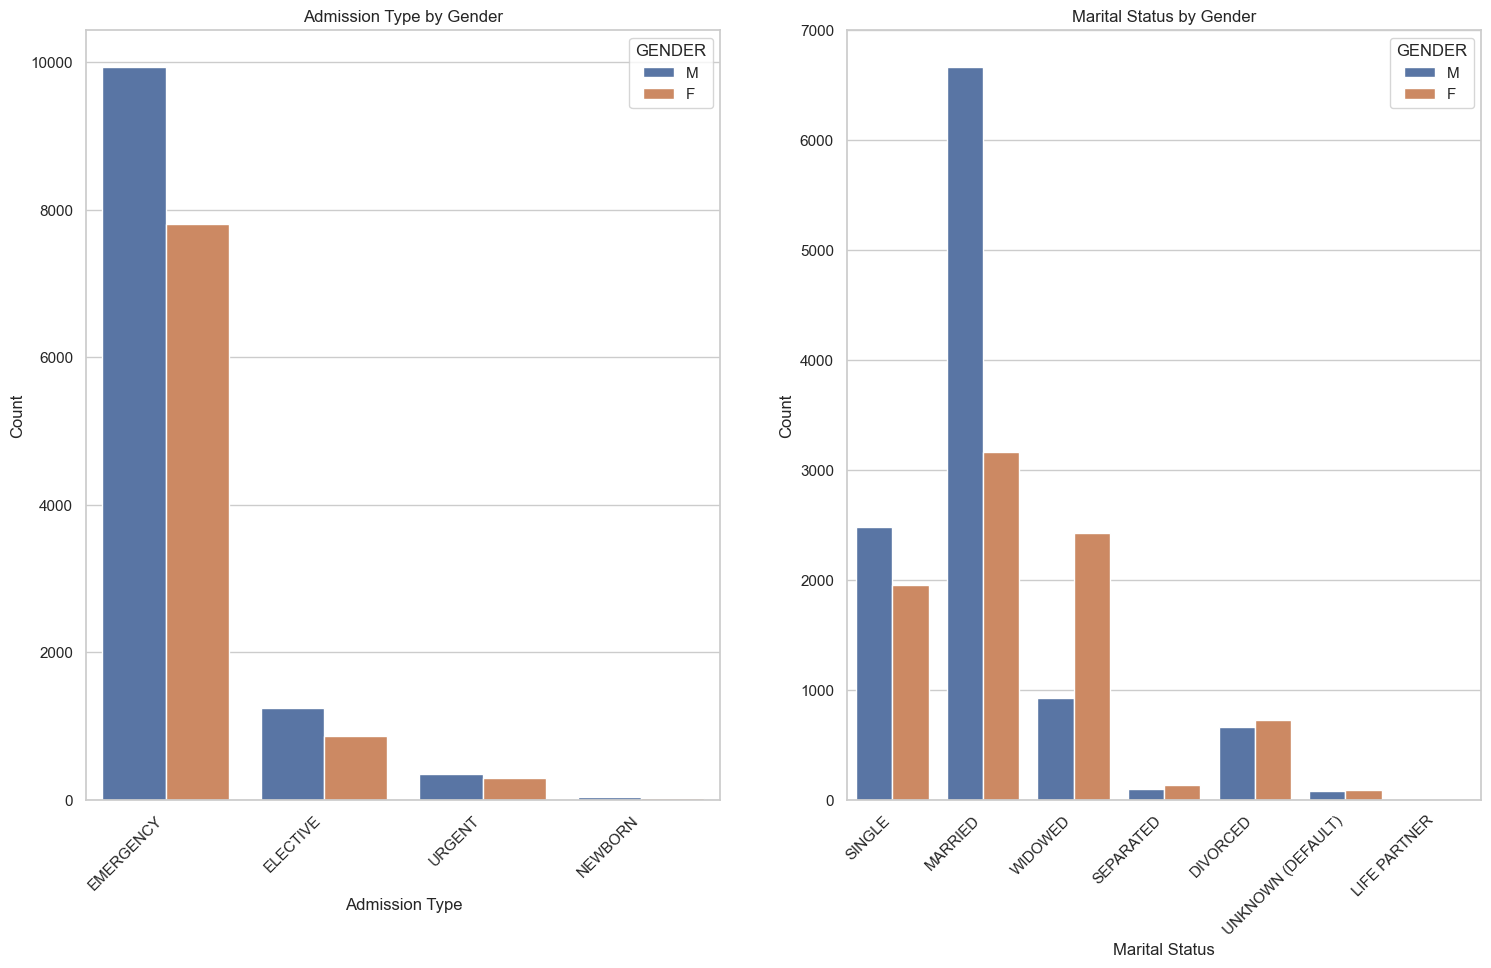

In [437]:
# Create a complex visualization
plt.figure(figsize=(18, 10))

# Analysis 1: Count plot of Admission Types by Gender
plt.subplot(1, 2, 1)
sns.countplot(data=merged_data_admissions, x='ADMISSION_TYPE', hue='GENDER')
plt.title("Admission Type by Gender")
plt.xlabel("Admission Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')

# Analysis 2: Count plot of Marital Status by Gender
plt.subplot(1, 2, 2)
sns.countplot(data=merged_data_admissions, x='MARITAL_STATUS', hue='GENDER')
plt.title("Marital Status by Gender")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')

## Patients and Procedures Table

In [438]:
# Convert the DataFrame to a dictionary to link itemid codes to respective labels
item_dict = d_items.set_index('ITEMID')['LABEL'].to_dict()

# Print the dictionary
print(item_dict)

{497: 'Patient controlled analgesia (PCA) [Inject]', 498: 'PCA Lockout (Min)', 499: 'PCA Medication', 500: 'PCA Total Dose', 501: 'PCV Exh Vt (Obser)', 927: 'Allergy 2', 930: 'Ext', 935: 'Allergy 3', 938: 'blood cultures', 940: 'trach care', 941: 'urine culture', 942: 'BLOOD CULTURES', 944: 'Chest PT', 946: 'STV', 956: 'CPT', 964: 'THAM CC/HR', 968: 'EKG', 970: 'TRACH CARE', 972: 'passy muir valve', 977: 'TRACHE CARE', 981: 'dilaudid', 983: 'LEECH THERAPY', 986: 'ABG Hct', 987: 'Clot to Blood Bank', 993: 'bladder pressure', 996: 'BLADDER PRESSURE', 1000: 'cisatricurium', 1001: 'rotation', 1003: 'cuff pressure', 1010: 'High exhaled min vol', 1011: 'urine osmolarity', 1015: 'PASSY MUIR VALVE', 1019: 'THIGH HI TEDS', 1022: 'Trach care', 1023: 'cisatra mcg/kg/min', 1027: 'abdominal binder', 1028: 'Cisatracurium', 1029: 'INCENTIVE SPIROMETER', 1032: 'Hi/minute/vol/alarm', 1034: 'RA SAT', 1035: 'WEDGE SAT', 1036: 'protonics', 1037: 'O2 %', 1038: 'Hi/minute/vols alarm', 1039: 'MDI #4', 1040: 

In [440]:
# Merge procedures with patients on subject_id
merged_data_procedures = pd.merge(df[df['AGE'] < 100], procedure_events, on='SUBJECT_ID', how='inner')

# Get the top item codes for each gender
top_item_codes_male = merged_data_procedures[merged_data_procedures['GENDER'] == 'M']['ITEMID'].value_counts().head(10)
top_item_codes_female = merged_data_procedures[merged_data_procedures['GENDER'] == 'F']['ITEMID'].value_counts().head(10)

In [441]:
import pandas as pd
import plotly.graph_objects as go

# Create a DataFrame for male and female diagnosis codes
male_df = pd.DataFrame({'item_code': top_item_codes_male.index, 'count': top_item_codes_male.values})
female_df = pd.DataFrame({'item_code': top_item_codes_female.index, 'count': top_item_codes_female.values})

# Map item codes to short titles
male_df['labels'] = male_df['item_code'].map(item_dict)
female_df['labels'] = female_df['item_code'].map(item_dict)

# # Create a new column 'hover_text' that combines 'item_code', 'labels', and 'count'
male_df['hover_text'] = male_df['item_code'].astype(str) + '<br>Name: ' + male_df['labels'] + '<br>Item Code: ' + male_df['item_code'].astype(str) + '<br>Count: ' + male_df['count'].astype(str)
female_df['hover_text'] = female_df['item_code'].astype(str) + '<br>Disease name: ' + female_df['labels'] + '<br>Item Code: ' + female_df['item_code'].astype(str) + '<br>Count: ' + female_df['count'].astype(str)

# Create treemaps using Plotly Graph Objects with custom hover data and template
fig_male = go.Figure(go.Treemap(
    labels=male_df['labels'],
    parents=[''] * len(male_df),  # Set parent to empty string to remove parent levels
    values=male_df['count'],
    customdata=male_df[['item_code', 'hover_text']],
    hovertemplate='<b>%{customdata[0]}</b><br>%{customdata[1]}',
))
fig_male.update_layout(title='Top 10 Procedure Codes for Male Subjects')

fig_female = go.Figure(go.Treemap(
    labels=female_df['labels'],
    parents=[''] * len(female_df),  # Set parent to empty string to remove parent levels
    values=female_df['count'],
    customdata=female_df[['item_code', 'hover_text']],
    hovertemplate='<b>%{customdata[0]}</b><br>%{customdata[1]}',
))
fig_female.update_layout(title='Top 10 Procedure Codes for Female Subjects')

# Show the treemaps
fig_male.show()
fig_female.show()

## Scatterplot

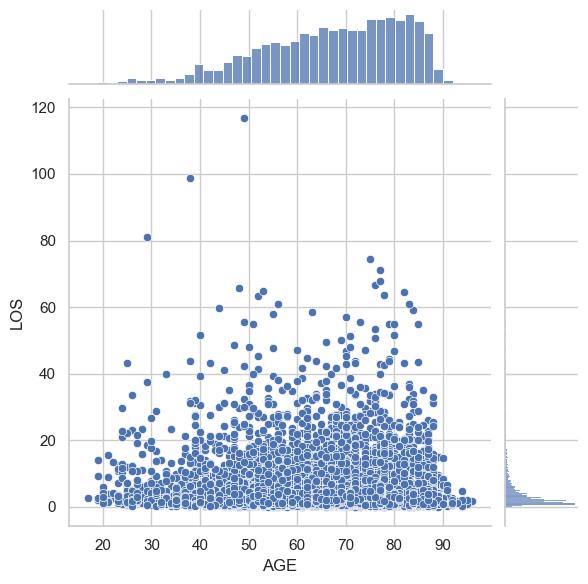

In [464]:
# Create a joint plot using Seaborn
sns.set(style="whitegrid")
sns.jointplot(data=merged_data_icu[merged_data_icu['FIRST_CAREUNIT'] == 'MICU'], x='AGE', y='LOS', kind='scatter')
plt.show()

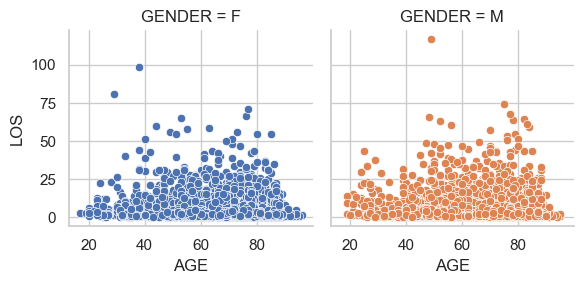

In [467]:
# Create a facet grid of joint plots for each gender
g = sns.FacetGrid(merged_data_icu[merged_data_icu['FIRST_CAREUNIT'] == 'MICU'], col='GENDER', hue='GENDER')
g.map(sns.scatterplot, 'AGE', 'LOS')
plt.show()